# Python 101 for MVPs 
Hello everyone. *Welcome to the Python tour at the Excel MVP Virtual summit*. 

First, let's explore some basics.


In [1]:
print("hello world")

hello world


In [2]:
#create a function with input and call it
def say_hello(recipient):
    s = 'Hello, {}!'.format(recipient)
    return s

#call the function
say_hello('MVPs')


'Hello, MVPs!'

In [3]:
#loops
for x in range(0, 3):
    print("We're on time %d" % (x))

We're on time 0
We're on time 1
We're on time 2


# Data wrangling 

Python is the most "typical" language for data analysis (of course we know Excel's formula language is the worlds most popular programming language).  One of the reasons is due to it's awesome set of libaries. One of the most common for working with data is called *Pandas*.

[Pandas](https://pandas.org) is a open source, fast and powerful library at handling data. Pandas lets you work with data across a variety of artifacts, in Excel like fashions. At core is a datastructre called the data frame, which even looks like a grid!

![Pandas](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)

In [5]:
#import the library into jupyter. Assumes libary has been pre-installled.
import pandas as pd

#pandas - simple example of creating a data frame from an array
df = pd.DataFrame({
        "Name": ["Braund, Mr. Owen Harris",
                 "Allen, Mr. William Henry",
                 "Bonnell, Miss. Elizabeth"],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]}
   )

df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [7]:
#get contoso sales from 2018, Q3
df = pd.read_excel("ContosoFruitSales2018.xlsx", sheet_name="Q1")

#return top 10 results
df.head(10)


,account,Product,Sold,Month
0,Contoso,Apples,28411,January
1,Contoso,Oranges,33200,January
2,Contoso,Bananas,49692,January
3,Contoso,Grapes,94660,January
4,Contoso,Apples,88124,February
5,Contoso,Oranges,47809,February
6,Contoso,Bananas,28894,February
7,Contoso,Grapes,16659,February
8,Contoso,Apples,60609,March
9,Contoso,Oranges,11929,March


In [8]:
#read excel file and combine all sheets into one frame
df19 = pd.concat(pd.read_excel("ContosoFruitSales2019.xlsx", sheet_name=None), ignore_index=True)

#Get top 10
df19.head(15)

,account,Product,Sold,Month
0,Contoso,Apples,71865,January
1,Contoso,Oranges,92297,January
2,Contoso,Bananas,23616,January
3,Contoso,Grapes,15358,January
4,Contoso,Apples,24189,February
5,Contoso,Oranges,63779,February
6,Contoso,Bananas,69531,February
7,Contoso,Grapes,35509,February
8,Contoso,Apples,76239,March
9,Contoso,Oranges,72733,March


In [26]:
#Get Contoso Sales for past 4 years
all_data = pd.DataFrame()
years = ["2016", "2017", "2018", "2019"]

for year in years:
    #get sales by year
    df = pd.concat(pd.read_excel("ContosoFruitSales" + year + ".xlsx", sheet_name=None), ignore_index=True)
    df["year"] = year
    
    #append the year sales to master data frame
    all_data = all_data.append(df,ignore_index=True)
    

all_data = all_data.drop(columns=["account"])
all_data

,Product,Sold,Month,year
0,Apples,99570,January,2016
1,Oranges,84034,January,2016
2,Bananas,15058,January,2016
3,Grapes,27598,January,2016
4,Apples,70748,February,2016
5,Oranges,1841,February,2016
6,Bananas,8901,February,2016
7,Grapes,62200,February,2016
8,Apples,79989,March,2016
9,Oranges,70740,March,2016


# Data Visualizations
You can use libraries to create custom data visualizations. Here we'll use a couple of popular libraries - matplotlib for basic charting and seaborn

In [36]:
#import the libraries. Note: you many need to "pip install <library name>"
%matplotlib inline  

#import matplotlib.pyplot as plt
import seaborn as sns

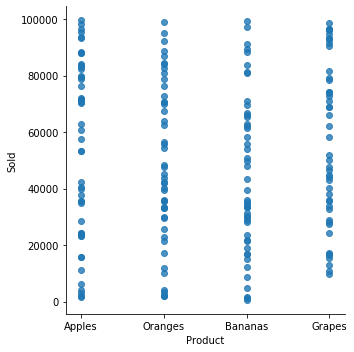

In [37]:
#create x-y scatter
sns.lmplot('Product', 'Sold', data=all_data, fit_reg=False)

In [29]:
#create a dataframe with random numbers
df = pd.DataFrame()
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)
df.head()

,x,y
0,74,23
1,16,43
2,67,27
3,78,58
4,82,81


In [35]:
#create heatmap
#sns.heatmap([all_data.product, all_data.Sold], annot=True, fmt="d")

IndexError: Inconsistent shape between the condition and the input (got (2, 1) and (2,))

# Analysis/ML in Python

Python has an awesome set of data science libraries. Some popular ones are numpy, scikit-learn, tensorflow, pytorch for data processing and machine learning.

Let's use one called Stocker. Stocker is a open source python tool that uses ANN (Artificial Nueral Network) to predict the stock's close price for the next business day: https://github.com/jcamiloangarita/stocker.

In [ ]:
import stocker

def predict(stock):
    return stocker.predict.tomorrow(stock)


#imagine a UDF function in Excel
predict("AMZN")